In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm

In [3]:
df = pd.read_csv('./data/who_suicide_statistics.csv')

In [25]:
df = df.loc[df.year>2014]

In [26]:
df.head()

,country,year,sex,age,suicides_no,population
360,Albania,2015,female,15-24 years,NaN,212324.0
361,Albania,2015,female,25-34 years,NaN,199024.0
362,Albania,2015,female,35-54 years,NaN,400275.0
363,Albania,2015,female,5-14 years,NaN,168140.0
364,Albania,2015,female,55-74 years,NaN,289055.0


In [27]:
df.country.unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Belarus', 'Belgium',
       'Belize', 'Bermuda', 'Brazil', 'Brunei Darussalam', 'Chile',
       'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala',
       'Hong Kong SAR', 'Hungary', 'Iceland', 'Iran (Islamic Rep of)',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico',
       'Mongolia', 'Montserrat', 'Netherlands', 'Nicaragua', 'Norway',
       'Occupied Palestinian Territory', 'Panama', 'Peru', 'Poland',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Republic of Moldova',
       'Rodrigues', 'Romania', 'Russian Federation',
       'Saint Kitts and Nevis', 'Saint Vincent and Grenadines',
       'San Marino', 'Serbia', 'Seychelles', 'Sing

In [28]:
countries =('Albania',  'Argentina',
       'Armenia', 'Australia', 'Austria', 'Belarus', 'Belgium',
       'Belize', 'Brazil',  'Chile',
       'Colombia', 'Croatia',  'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'Georgia', 'Germany', 'Greece', 'Guatemala',
       'Hong Kong SAR', 'Hungary', 'Iceland', 'Iran (Islamic Rep of)',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico',
       'Mongolia',  'Netherlands', 'Nicaragua', 'Norway',
       'Occupied Palestinian Territory', 'Panama', 'Peru', 'Poland',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Republic of Moldova',
       'Romania', 'Russian Federation',       
       'Serbia', 'Singapore', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Tajikistan',
       'Thailand', 'Turkey', 'Turkmenistan', 'Ukraine', 'United Kingdom',
       'United States of America', 'Uruguay')
df = df.loc[df['country'].isin(countries)]
    


In [29]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand',
'Australia', 'Sweden', 'Austria')

df2 = df.loc[df['country'].isin(top_countries)].copy()

In [30]:
df2.head()

,country,year,sex,age,suicides_no,population
2592,Australia,2015,female,15-24 years,110.0,1526305.0
2593,Australia,2015,female,25-34 years,119.0,1747715.0
2594,Australia,2015,female,35-54 years,294.0,3203643.0
2595,Australia,2015,female,5-14 years,8.0,1428159.0
2596,Australia,2015,female,55-74 years,152.0,2411343.0


In [31]:
df2['percent'] = round((df2.suicides_no)/(df2.population)*100, 3)

In [32]:
df2.country.unique()
#not all countries from my World Happiness Report are in this dataset 

array(['Australia', 'Austria', 'Denmark', 'Finland', 'Iceland',
       'Netherlands', 'Norway', 'Sweden', 'Switzerland'], dtype=object)

### Create a percent column in the original df and find the average world percentage of suicides

In [33]:
df['percent'] = (df.suicides_no/df.population)*100

In [34]:
round(df.percent.mean(),3)

0.012

### Plot the average suicide rates of top 10 happiest countries, horizontal line is world average

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

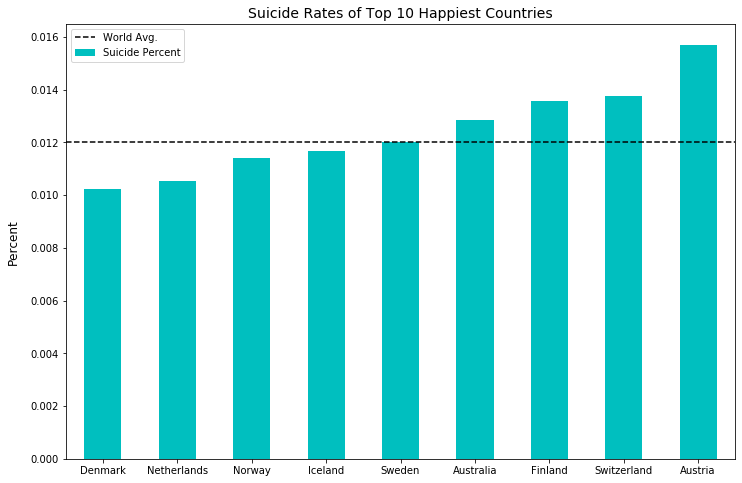

In [35]:
df2.groupby('country')['percent'].mean().sort_values(ascending=True).plot(kind='bar', figsize=(12,8), color='c', label='Suicide Percent')
plt.axhline(y=0.012, color='black', linestyle='--', label=('World Avg.'))
plt.title('Suicide Rates of Top 10 Happiest Countries', fontsize=14)
plt.xlabel('')
plt.ylabel('Percent',labelpad=10, fontsize=12)
plt.legend()
plt.xticks(rotation=0)

### None of the bottom 10 countries from WHR are in this dataset!

In [36]:
#bottom_countries = ('Togo', 'Burundi', 'Syria', 'Benin', 'Rwanda', 'Afghanistan', 'Burkina Faso', 'Ivory Coast', 'Guinea',
#'Chad', 'Liberia', 'Tanzania', 'Madagascar', 'Central African Republic', 'South Sudan', 'Yemen', 'Haiti', 'Malawi', 'Botswana')

#df3 = df.loc[df['country'].isin(bottom_countries)]


## Start with new dataset

In [37]:
sc = pd.read_csv('./suicide_stats.csv')


In [38]:
sc = sc.drop(['2000', '2010'], axis=1)

In [39]:
sc.head()

,Country,Sex,2016,2015
0,Afghanistan,Both sexes,6.4,6.6
1,Afghanistan,Male,10.6,10.9
2,Afghanistan,Female,2.1,2.1
3,Albania,Both sexes,5.6,5.3
4,Albania,Male,7.0,6.7


In [40]:
sc['Average'] = (sc['2016'] + sc['2015'])/2

In [41]:
sc.sort_values('Country', ascending=False)

,Country,Sex,2016,2015,Average
548,Zimbabwe,Female,11.1,11.1,11.10
547,Zimbabwe,Male,29.1,28.7,28.90
546,Zimbabwe,Both sexes,19.1,18.9,19.00
545,Zambia,Female,6.2,6.1,6.15
544,Zambia,Male,17.5,17.4,17.45
543,Zambia,Both sexes,11.3,11.2,11.25
542,Yemen,Female,6.2,6.3,6.25
541,Yemen,Male,13.4,13.6,13.50
540,Yemen,Both sexes,9.8,9.9,9.85
539,Viet Nam,Female,3.4,3.5,3.45


In [42]:
sc_both = sc.loc[sc['Sex']=='Both sexes']

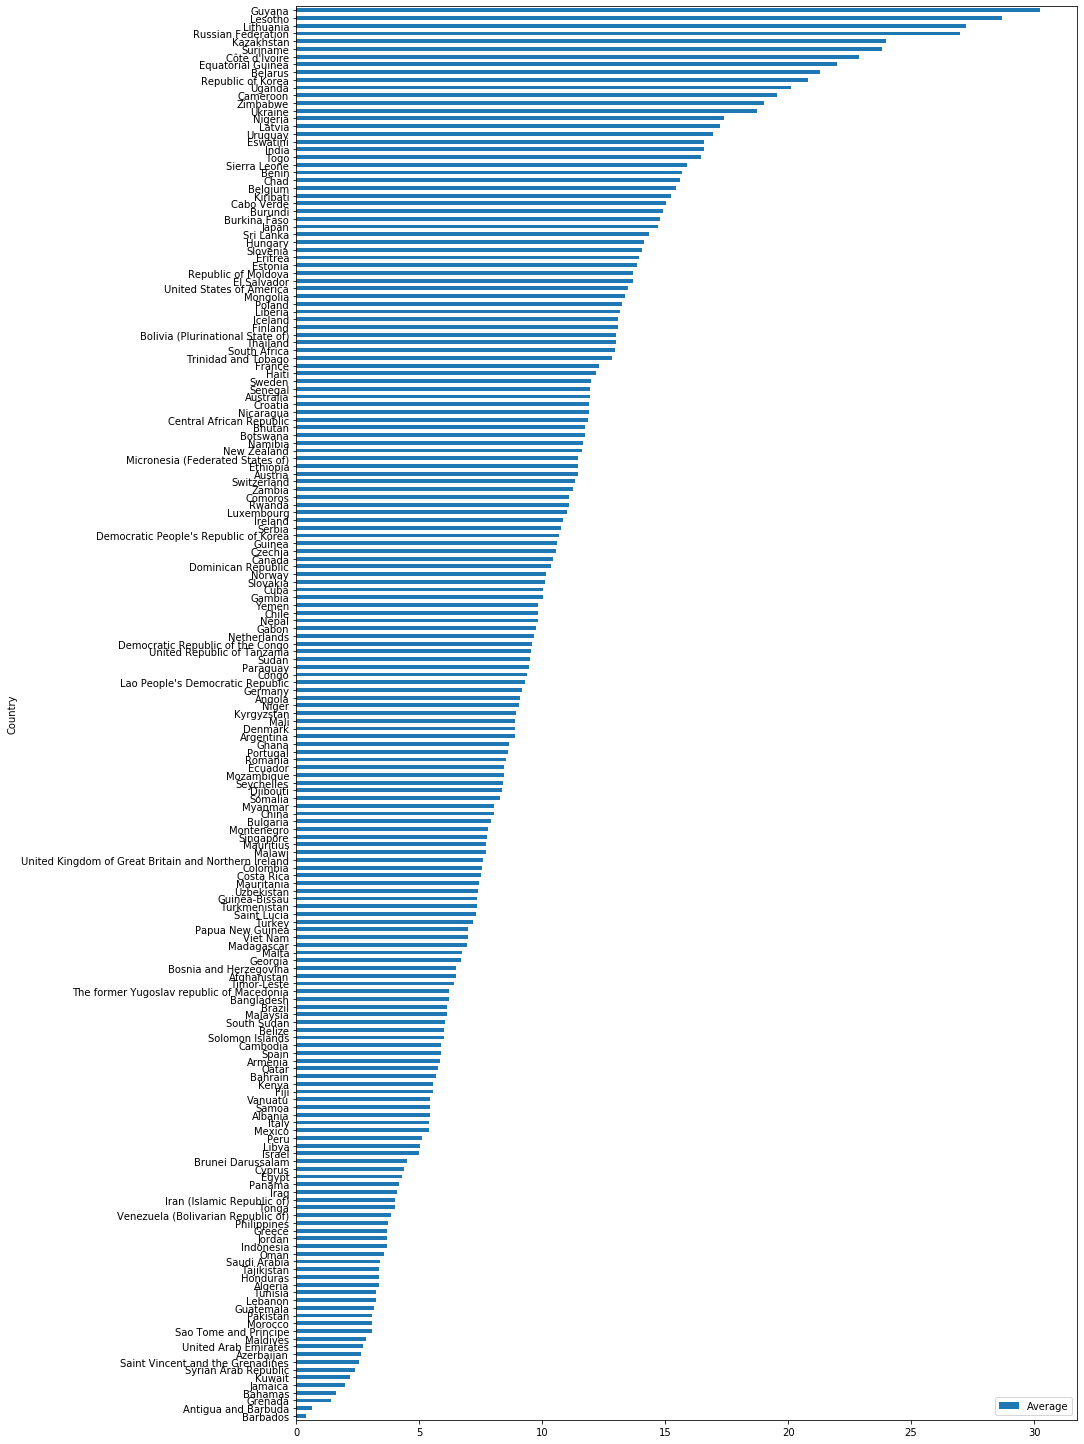

In [43]:
sc_both.sort_values(by='Average').plot(kind='barh', x='Country', y='Average', figsize=(14,26))

In [44]:
sc_both = sc_both.copy()

In [45]:
sc_both['Rank'] = sc_both.Average.rank().astype(int)

In [46]:
sc_both.head()

,Country,Sex,2016,2015,Average,Rank
0,Afghanistan,Both sexes,6.4,6.6,6.50,58
3,Albania,Both sexes,5.6,5.3,5.45,40
6,Algeria,Both sexes,3.3,3.4,3.35,19
9,Angola,Both sexes,8.9,9.3,9.10,94
12,Antigua and Barbuda,Both sexes,0.5,0.8,0.65,2


In [47]:
whr15 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2015.csv')

Text(0.5, 1.0, 'Suicide vs Happiness Rank')

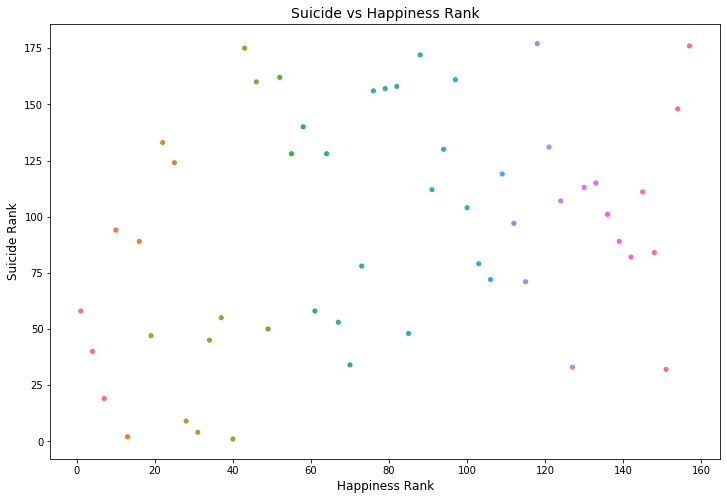

In [74]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=whr15['Happiness Rank'], y=sc_both.Rank, hue=whr15.Country, legend = False)
plt.ylabel('Suicide Rank', fontsize=12)
plt.xlabel('Happiness Rank', fontsize=12)
plt.title('Suicide vs Happiness Rank', fontsize=14)

In [49]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand',
'Australia', 'Sweden', 'Austria')

sc2 = sc.loc[sc['Country'].isin(top_countries)]

In [50]:
sc2.head()

,Country,Sex,2016,2015,Average
21,Australia,Both sexes,11.7,12.2,11.95
22,Australia,Male,17.4,18.3,17.85
23,Australia,Female,6.0,6.2,6.10
24,Austria,Both sexes,11.4,11.5,11.45
25,Austria,Male,17.5,18.2,17.85


In [51]:
sc2_both = sc2.loc[sc2['Sex']=='Both sexes'].copy()

In [52]:
sc2_both

,Country,Sex,2016,2015,Average
21,Australia,Both sexes,11.7,12.2,11.95
24,Austria,Both sexes,11.4,11.5,11.45
90,Canada,Both sexes,10.4,10.5,10.45
138,Denmark,Both sexes,9.2,8.6,8.90
174,Finland,Both sexes,13.8,12.4,13.10
222,Iceland,Both sexes,13.3,12.9,13.10
345,Netherlands,Both sexes,9.6,9.7,9.65
348,New Zealand,Both sexes,11.6,11.6,11.60
360,Norway,Both sexes,10.1,10.2,10.15
468,Sweden,Both sexes,11.7,12.3,12.00


In [53]:
round(sc.loc[sc['Sex']=='Both sexes']['2016'].mean(),2)

9.68

In [54]:
round(sc.loc[sc['Sex']=='Both sexes']['2015'].mean(), 2)

9.81

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

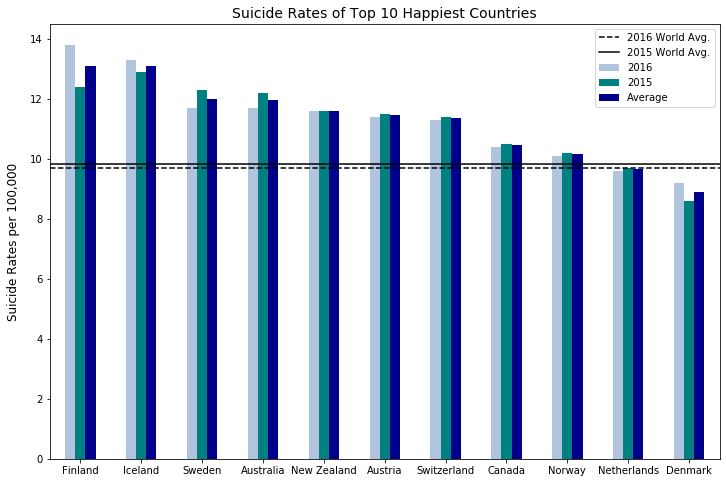

In [76]:
#sc2_both.sort_values(by='Average', ascending=False).plot(x='Country', kind='bar', color = ('rebeccapurple','orange', 'darkturquoise'), figsize=(10,8))
sc2_both.sort_values(by='Average', ascending=False).plot(x='Country', kind='bar', color = ('lightsteelblue', 'teal', 'darkblue'), figsize=(12,8))
plt.axhline(y=9.68, color='black', linestyle='--', label='2016 World Avg.')
plt.axhline(y=9.81, color='black', linestyle='-', label='2015 World Avg.')
plt.title('Suicide Rates of Top 10 Happiest Countries', fontsize=14)
plt.xlabel('')
plt.ylabel('Suicide Rates per 100,000',labelpad=10, fontsize=12)
plt.legend()
plt.xticks(rotation=0)

### Suicide rates of top 10 countries broken down by gender

In [56]:
m_and_f = sc.loc[(sc['Sex']=='Male') | (sc['Sex']=='Female')]
m_and_f.head()

,Country,Sex,2016,2015,Average
1,Afghanistan,Male,10.6,10.9,10.75
2,Afghanistan,Female,2.1,2.1,2.10
4,Albania,Male,7.0,6.7,6.85
5,Albania,Female,4.3,4.0,4.15
7,Algeria,Male,4.9,5.0,4.95


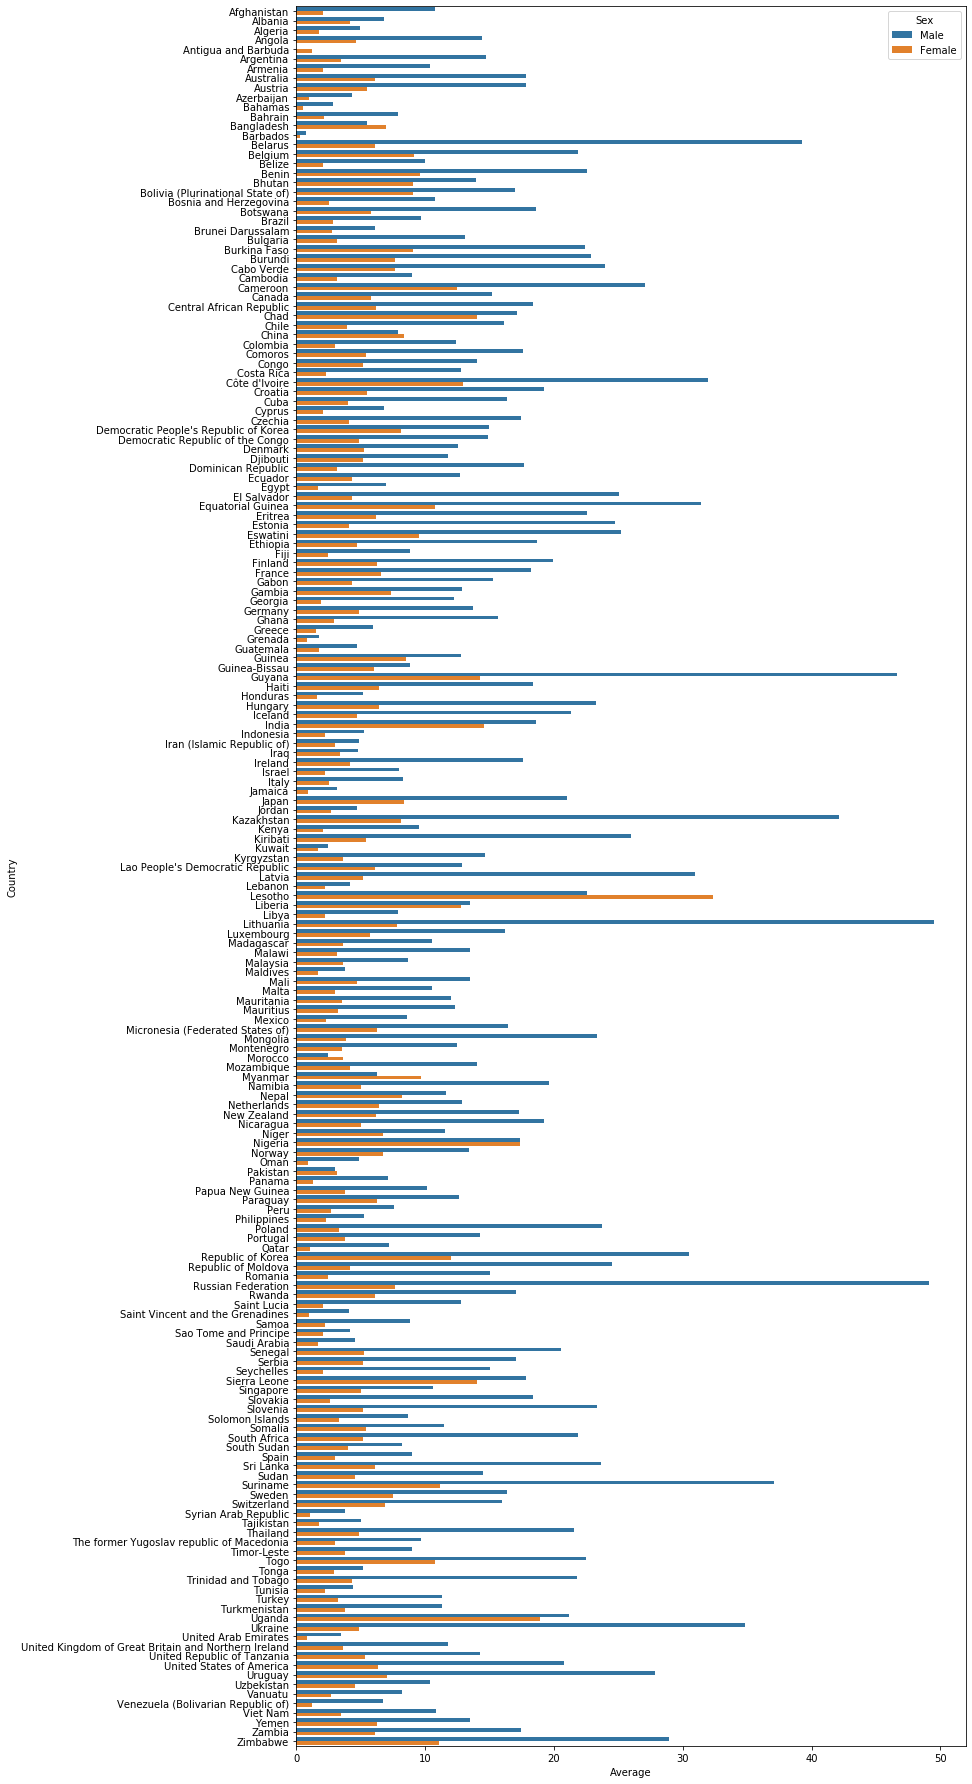

In [57]:
plt.figure(figsize=(12,32))
sns.barplot(y=m_and_f.Country, x=m_and_f.Average, hue = m_and_f.Sex)



In [58]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand',
'Australia', 'Sweden', 'Austria')
m_and_f_top = m_and_f.loc[m_and_f.Country.isin(top_countries)]
m_and_f_top.head()                          

,Country,Sex,2016,2015,Average
22,Australia,Male,17.4,18.3,17.85
23,Australia,Female,6.0,6.2,6.10
25,Austria,Male,17.5,18.2,17.85
26,Austria,Female,5.7,5.3,5.50
91,Canada,Male,15.1,15.3,15.20


([<matplotlib.axis.XTick at 0x1d33db8bb38>,
 <a list of 6 Text xticklabel objects>)

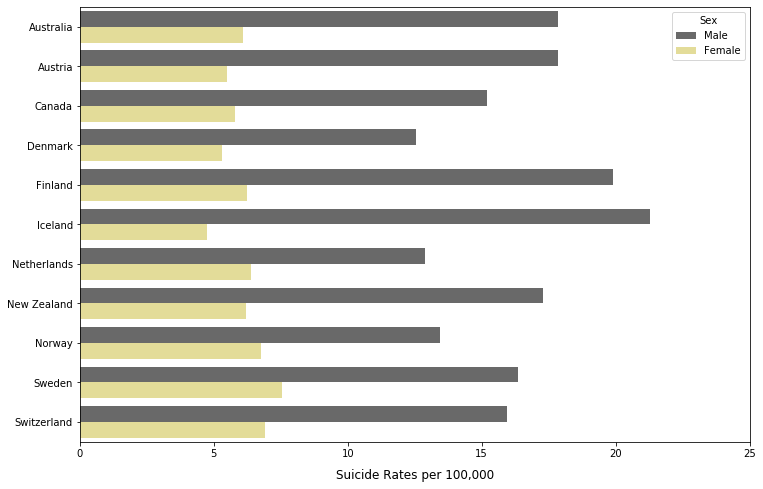

In [59]:
plt.figure(figsize=(12,8))
c=('dimgrey', 'khaki')
sns.barplot(y=m_and_f_top.Country, x=m_and_f_top.Average, hue = m_and_f_top.Sex, palette=c)
plt.xlabel('Suicide Rates per 100,000', labelpad=10, fontsize=12)
plt.ylabel('')
plt.xticks([0,5,10,15,20, 25])

In [60]:
bottom_countries = ('Togo', 'Burundi', 'Syria', 'Benin', 'Rwanda', 'Afghanistan', 'Burkina Faso', 'Ivory Coast', 'Guinea',
'Chad', 'Liberia', 'Tanzania', 'Madagascar', 'Central African Republic', 'South Sudan', 'Yemen', 'Haiti', 'Malawi', 'Botswana')
m_and_f_bottom = m_and_f.loc[m_and_f.Country.isin(bottom_countries)].sort_values('Average')
m_and_f_bottom.head()

,Country,Sex,2016,2015,Average
2,Afghanistan,Female,2.1,2.1,2.10
299,Malawi,Female,3.2,3.2,3.20
296,Madagascar,Female,3.6,3.7,3.65
455,South Sudan,Female,4.1,4.0,4.05
65,Botswana,Female,5.7,5.9,5.80


([<matplotlib.axis.XTick at 0x1d33f907f60>,
 <a list of 6 Text xticklabel objects>)

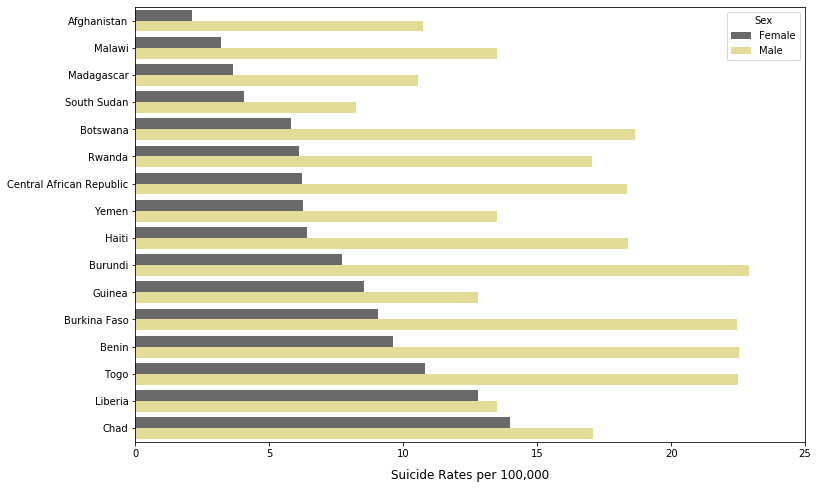

In [61]:
plt.figure(figsize=(12,8))
c=('dimgrey', 'khaki')
sns.barplot(y=m_and_f_bottom.Country, x=m_and_f_bottom.Average, hue = m_and_f_bottom.Sex, palette=c)
plt.ylabel('')
plt.xlabel('Suicide Rates per 100,000', labelpad=10, fontsize=12)
plt.xticks([0,5,10,15,20,25])

In [62]:


bottom = sc.loc[sc['Country'].isin(bottom_countries)]

In [63]:
bottom.Country.unique()


array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Central African Republic', 'Chad', 'Guinea', 'Haiti', 'Liberia',
       'Madagascar', 'Malawi', 'Rwanda', 'South Sudan', 'Togo', 'Yemen'],
      dtype=object)

In [64]:
bottom.reset_index(drop=True).head()

,Country,Sex,2016,2015,Average
0,Afghanistan,Both sexes,6.4,6.6,6.50
1,Afghanistan,Male,10.6,10.9,10.75
2,Afghanistan,Female,2.1,2.1,2.10
3,Benin,Both sexes,15.7,15.7,15.70
4,Benin,Male,22.6,22.5,22.55


In [65]:
bottom_both = bottom.loc[bottom['Sex']=='Both sexes']

In [66]:
bottom_both

,Country,Sex,2016,2015,Average
0,Afghanistan,Both sexes,6.4,6.6,6.50
51,Benin,Both sexes,15.7,15.7,15.70
63,Botswana,Both sexes,11.5,12.0,11.75
75,Burkina Faso,Both sexes,14.8,14.8,14.80
78,Burundi,Both sexes,15.0,14.8,14.90
93,Central African Republic,Both sexes,11.6,12.1,11.85
96,Chad,Both sexes,15.5,15.7,15.60
204,Guinea,Both sexes,10.5,10.7,10.60
213,Haiti,Both sexes,12.2,12.2,12.20
282,Liberia,Both sexes,13.4,12.9,13.15


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

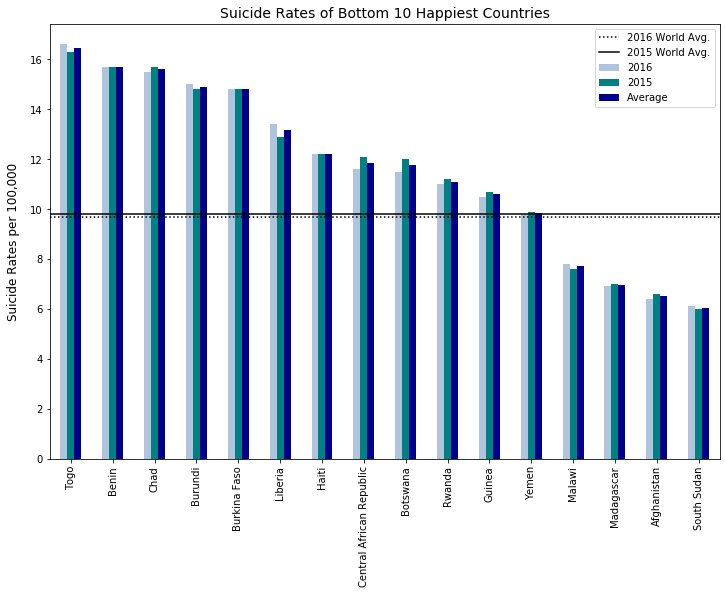

In [83]:
bottom_both.sort_values(by='Average', ascending = False).plot(x='Country', kind='bar', color = ('lightsteelblue', 'teal', 'darkblue'), figsize=(12,8))

plt.axhline(y=9.68, color='black', linestyle='dotted', label='2016 World Avg.')
plt.axhline(y=9.81, color='black', linestyle='-', label='2015 World Avg.')
plt.title('Suicide Rates of Bottom 10 Happiest Countries', fontsize=14)
plt.xlabel('')
plt.ylabel('Suicide Rates per 100,000',labelpad=10, fontsize=12)
plt.legend()
plt.xticks(rotation=90)

In [68]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [73]:
data = dict(type = 'choropleth', 
           locations = sc_both['Country'],
           locationmode = 'country names',
           z = sc_both['Average'], 
           text = sc_both['Country'],
           colorbar = {'title':'Suicide Rates <br>per 100,000'},
           colorscale = 'Spectral',
            reversescale=True
           )
layout = dict(title = 'Average Suicide Rates', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)


### World map of suicide rates for just 2015

In [70]:
data = dict(type = 'choropleth', 
           locations = sc_both['Country'],
           locationmode = 'country names',
           z = sc_both['2015'], 
           text = (sc_both['Country'],sc_both['Rank']),
           colorbar = {'title':'Suicide Rates per 100,000'},
           colorscale = 'Spectral')
layout = dict(title = 'Average Suicide Rates for 2015', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)


### And for 2016

In [71]:
data = dict(type = 'choropleth', 
           locations = sc_both['Country'],
           locationmode = 'country names',
           z = sc_both['2016'], 
           text = sc_both['Country'],
           colorbar = {'title':'Suicide Rates per 100,000'},
           colorscale = 'Spectral')
layout = dict(title = 'Average Suicide Rates for 2016', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)
